# Imports

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from scipy.io import wavfile
from scipy.fft import fft, fftfreq
from scipy.signal import convolve, fftconvolve

# Playing with Spectrum

## Intro

In christmas eve I recorded a [vibration sound from a wine glass](https://youtu.be/80tmW5n5J-U).

I decided to try capturing the spectrum (FFT) from the audio.

## References

- [FFT with Scipy, RealPython](https://realpython.com/python-scipy-fft/)
- [FFT with Numpy](https://numpy.org/doc/stable/reference/routines.fft.html)
- [Visualization of FFT](https://canlab.github.io/_pages/tutorials/html/sin_cos_fft.html)
- [Chrome Music Lab - Spectrogram](https://musiclab.chromeexperiments.com/Spectrogram/).

# Defining Some Functions

In [65]:
def get_audio(audio_path: Path) -> tuple:
    """
    Get audio data from wav file in auido_path.

    Parameters
    ----------
    audio_path : Path
        Path to wav file.

    Returns
    -------
    data : ndarray
        Audio data.
    sample_rate : int
        Sample rate of audio data. That is, how many samples are taken each second.
    duration : float
        Duration of audio data in seconds.
    """
    sample_rate, data = wavfile.read(str(audio_path))
    duration = data.shape[0]/sample_rate
    return data, sample_rate, duration

In [66]:
def plot_audio_in_time(data:np.array, sample_rate: int, duration: float, plot_title:str = 'Audio File'):
    """
    Plots the audio signal in time.

    Parameters
    ----------
    data : np.array
        The audio signal.
    sample_rate : int
        The sample rate of the audio signal.
    duration : float
        The duration of the audio signal.
    """
    time = np.arange(0, duration, 1/sample_rate)
    plt.plot(time, data, alpha=0.8)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(plot_title)
    plt.grid(True)
    plt.show()

In [67]:
def normalize_samples(samples: np.ndarray, 
                      bits:int = 16) -> np.ndarray:
    """
    Normalize samples in the range of a given representation.

    Parameters
    ----------
    samples : np.ndarray
        Samples to normalize.
    bits : int, optional
        Number of bits to represent the samples. The default is 16.

    Returns
    -------
    normalized_tone : np.ndarray
        Normalized samples.
    """
    scaler = 2**(bits-1)-1 # subtract 1 because half of the bits representation is positive.
    normalized_tone = np.int16((samples / samples.max()) * scaler)
    return normalized_tone

In [68]:
def get_fft_transform(normalized_samples: np.ndarray,
                      sample_rate: int,
                      duration: float):
    """
    Get the FFT transform of a normalized audio.

    Parameters
    ----------
    normalized_samples : np.ndarray
        The normalized samples of the tone.
    sample_rate : int
        The sample rate of the audio.
    duration : float
        The duration of the audio.

    Returns
    -------
    yf: np.ndarray
        The FFT transform of the audio
    xf: np.ndarray
        The frequency axis.
    """
    N = int(sample_rate * duration) # Number of samples in normalized_tone

    yf = fft(normalized_samples)
    xf = fftfreq(N, 1 / sample_rate)

    return yf, xf

In [69]:
def plot_audio_in_frequency(xf: np.ndarray,
                            yf: np.ndarray,
                            margins: tuple = [-4e3,4e3]):    
    """
    Plot  the FFT of the audio.

    Parameters
    ----------
    xf : np.ndarray
        The frequency axis.
    yf : np.ndarray
        The magnitude of the frequency.
    margin : float
        The margin to be used in the plot. It is applied in both sides (positive and negative). Defaults to 4e3.
    """
    plt.xlim((margins[0],margins[1]))
    plt.grid(True)
    plt.title(f'Fourier/Frequency Domain')
    plt.xlabel(f'Frequency (Hz)')
    plt.ylabel(f'Magnitude')
    plt.plot(xf, np.abs(yf))
    plt.show()

# Defining Some Paths

In [70]:
__file__ = 'audio_experiments.ipynb'
this_file_path = Path(__file__).absolute()
samples_path = this_file_path.parents[1] / 'audio-files' / 'samples'
impulses_responses_path = this_file_path.parents[1] / 'audio-files' / 'impulse-responses'
my_voice_file_path = samples_path / 'mateus_e_samuel.wav'
long_hall_echo_path = impulses_responses_path / 'Large Long Echo Hall.wav'

## Loading an Audio File and Plot

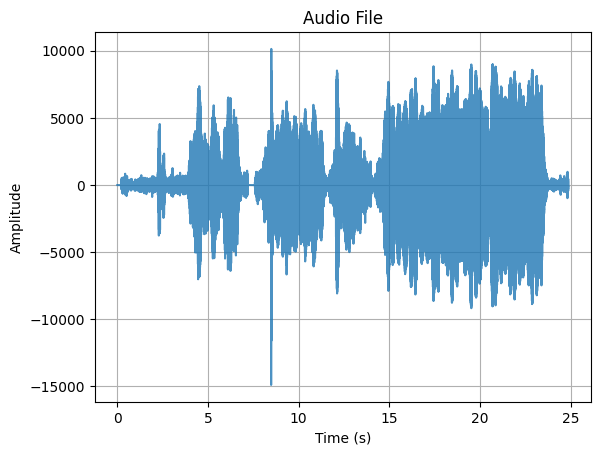

In [71]:
cup_sound_path = samples_path / 'cup_sound.wav'
data, sample_rate, duration = get_audio(str(cup_sound_path))
plot_audio_in_time(data,sample_rate,duration)

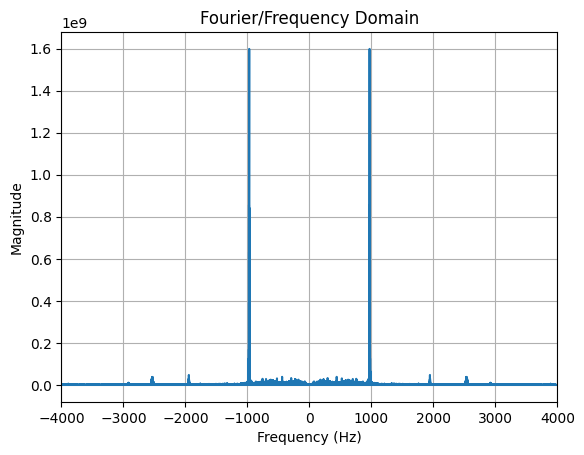

In [72]:
normalized_audio = normalize_samples(data)
yf, xf = get_fft_transform(normalized_audio, sample_rate, duration)
plot_audio_in_frequency(xf, yf)

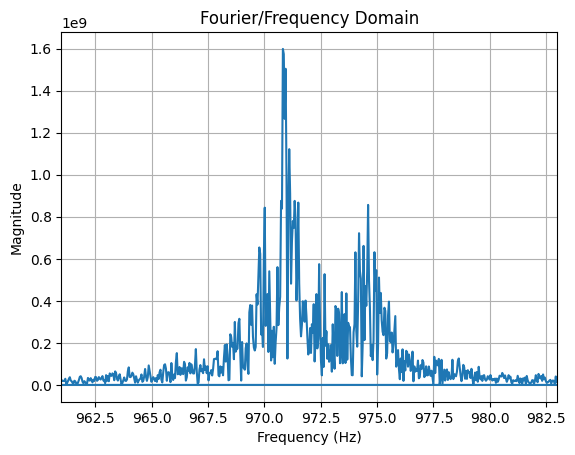

In [73]:
plot_audio_in_frequency(xf, yf,[961,983])

# Toy Example

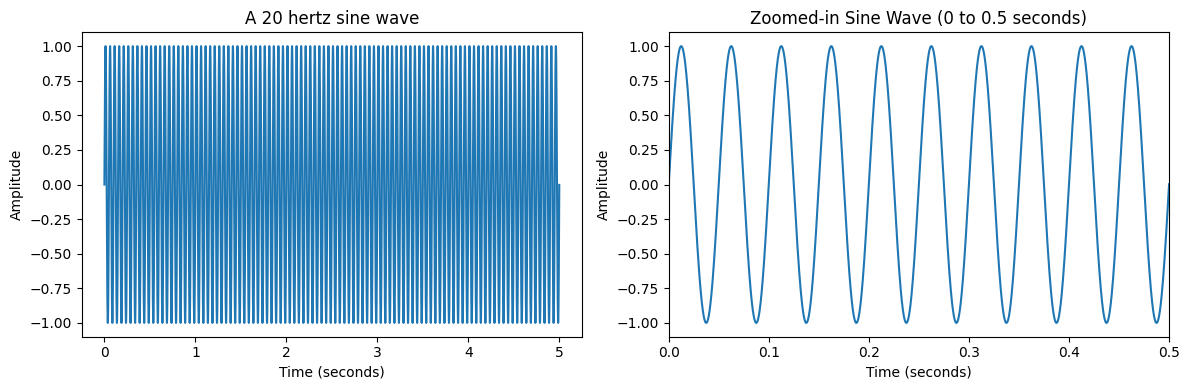

In [74]:
def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

sample_rate_for_example = 44100  # Sample rate in samples per second
duration_for_example = 5   # Duration of the sine wave in seconds

# Generate a frequency_example hertz sine wave that lasts for 5 seconds
frequency_example = 20
x, y = generate_sine_wave(frequency_example, sample_rate_for_example, duration_for_example)  # 440 Hertz is A (Lá)

# Create two subplots, side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the full sine wave on the left subplot
ax1.set_title(f'A {frequency_example} hertz sine wave')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('Amplitude')
ax1.plot(x, y)

# Plot the zoomed-in version on the right subplot
x_axis_max_lim_example = 0.5
ax2.set_title(f'Zoomed-in Sine Wave (0 to {x_axis_max_lim_example} seconds)')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Amplitude')
ax2.plot(x, y)

# Set the limits of the x-axis for the right subplot to zoom in
ax2.set_xlim(0, x_axis_max_lim_example)

# Show the plot
plt.tight_layout()  # To prevent overlapping of titles and labels
plt.show()


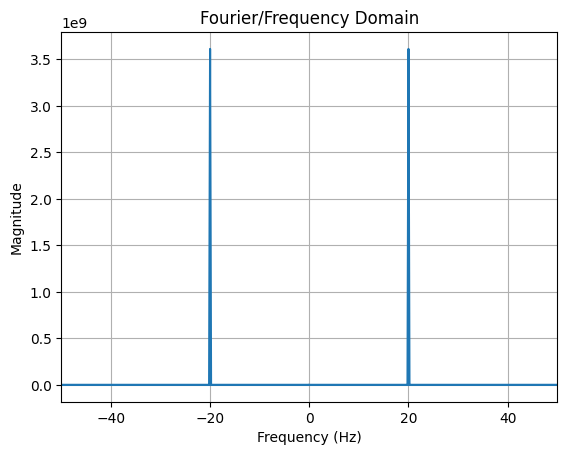

In [75]:
normalized_audio = normalize_samples(y)
yf_toy, xf_toy = get_fft_transform(normalized_audio, sample_rate_for_example, duration_for_example)
plot_audio_in_frequency(xf_toy, yf_toy,[-50,50])

# Impulse Responses

It is January 12th. I started googling Butterworth filters and remembered my good ol' Impulse Response experiments (I wanted to show Jhonathan how this stuff works). Guess what? I just found a library of [free reverb impulses](https://www.voxengo.com/impulses/). Maybe I didn't find something the first time because I was searching the wrong way. I guess I googled something like `impulse response cathedral`...

Whatever

When opening the IR file using `scipy.io.wavfile.read` I found it is a matrix. I think each column is a channel, and the audio is meant to be stereo. So, I'll take just one of the cols and that is it

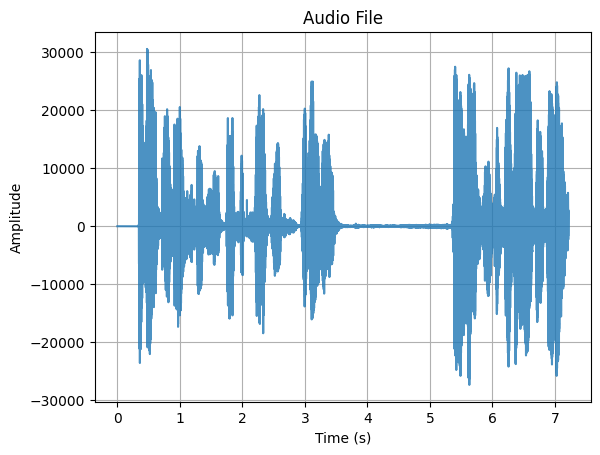

In [76]:
voice_data, voice_sample_rate, voice_duration = get_audio(my_voice_file_path)
plot_audio_in_time(voice_data, voice_sample_rate, voice_duration)

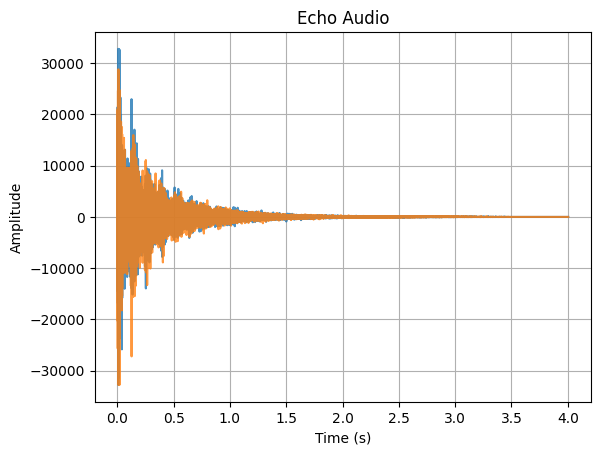

In [77]:
echo_data, echo_sample_rate, echo_duration = get_audio(long_hall_echo_path)
plot_audio_in_time(echo_data, echo_sample_rate, echo_duration, 'Echo Audio')

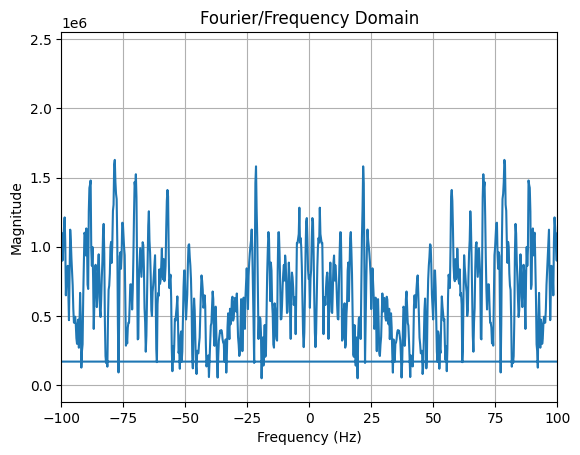

In [97]:
normalized_echo = normalize_samples(echo_data[:,1])
yf_echo, xf_echo = get_fft_transform(normalized_echo, echo_sample_rate, echo_duration)
plot_audio_in_frequency(xf_echo, yf_echo[:-1],[-100,100])

In [98]:
voice_echoed = fftconvolve(voice_data,echo_data[:,0])
plot_audio_in_time(voice_echoed,)

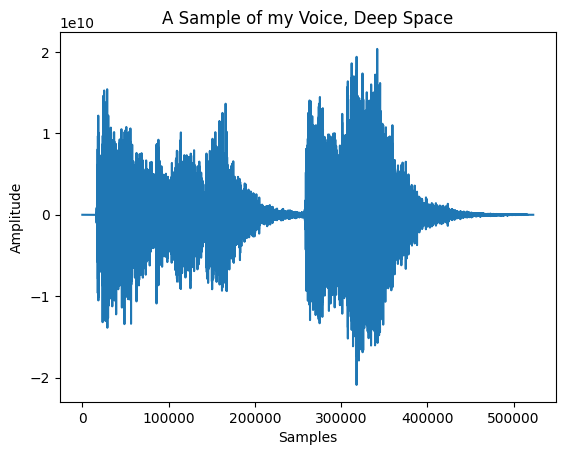

In [79]:
plt.title("A Sample of my Voice, Deep Space")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.plot(voice_deep_space)

# Writing Result
[Creating a `.wav` file](https://stackoverflow.com/questions/10357992/how-to-generate-audio-from-a-numpy-array)

In [80]:
results_path = this_file_path.parents[1] / 'audio-files' / 'results'
if not results_path.exists():
    results_path.mkdir()

result_file_path = results_path / 'mateus_e_sam_ecoado.wav'

In [81]:
example_file_path = results_path / f'sine_{frequency_example}_hz.wav'
scaled_example = np.int16( x / np.max(np.abs(x)) * 32767)
wavfile.write(str(example_file_path),sample_rate_for_example,scaled_example)

In [82]:
rate = 44100
scaled = np.int16(voice_deep_space / np.max(np.abs(voice_deep_space)) * 32767)
wavfile.write(str(result_file_path), rate, scaled)